# Machine Learning Digits Explorations - Miruna Andreea Gheata

# Consideracions prèvies

En aquest anàlisis s'han emprat dues funcions auxiliars. 

1) Aquest primer procediment serveix per poder representar millor la matriu de confusió de la classificació realitzada 
per un model determinat. Els paràmetres son: 
    - cm : matriu de confusió resultant de la funció confusion_matrix(y_test, model_entrenat)
    - classes : el nom de les classes (columnes) que hi ha en el dataset
    - normalize : booleà que serveix per poder dir si es volen normalitzar els valors
    - title : títol que es vulgui posar a la matriu de confusió
    - cmap: colors que es vulgui emprar per representar la matriu de confusió; serà Blau per defecte

In [1]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

\pagebreak

2) Procediment que construeix un boxplot amb els resultats que donen cada model entrenat. Els resultats es treuen
mitjançat el cross_val_score, tenint com métode de splitting el K-Fold amb 10 splits. 

In [2]:
def get_results(X, y):
    seed = 7
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('PRC', Perceptron(tol=1e-3, random_state=0)))
    models.append(('SVM', svm.SVC(kernel = 'linear', decision_function_shape='ovo')))
    models.append(('RF', RandomForestClassifier(n_estimators=100)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Mean accuracy: %f Standard deviation accuracy:(%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

3) Procediment que retorna el accuracy, el classification report i la matriu de confusió dels models entrenats. 

In [3]:
def print_results(model, classifier, test):
    print('1.- Accuracy of %s classifier on test set: {:.3f}'.format(metrics.accuracy_score(test, classifier))%(model))
    print("2.- Classification report for %s model:\n%s\n"
      % (model, metrics.classification_report(test, classifier)))
    print("3.- Confusion matrix:\n")
    cnf_matrix = confusion_matrix(test, classifier)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=digits.target_names, normalize=True,
                      title='Normalized confusion matrix')

\pagebreak

4) Procedmient que representa el gráfic de la funció d'aprenentatge d'un model determinat.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [4]:
import numpy as np 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [5]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def learning_curves():
    

    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    title = "Learning Curves (Logistic Regression)"
    estimator = LogisticRegression()
    plot_learning_curve(estimator, title, data_x, data_y, (0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()

    title = "Learning Curves (Perceptron)"
    estimator = Perceptron(tol=1e-3, random_state=0)
    plot_learning_curve(estimator, title, data_x, data_y, (0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()

    title = "Learning Curves (Random Forest, n_estimators=100)"
    estimator = RandomForestClassifier(n_estimators=100)
    plot_learning_curve(estimator, title, data_x, data_y, (0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()

    title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(gamma=0.001)
    plot_learning_curve(estimator, title, data_x, data_y, (0.7, 1.01), cv=cv, n_jobs=4)

    title = "Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
    estimator = SVC(kernel="linear", C=0.025)
    plot_learning_curve(estimator, title, data_x, data_y, (0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()

    title = "Learning Curves (SVM, Polynomial kernel, C=0.025)"
    estimator = SVC(kernel="poly", C=0.025)
    plot_learning_curve(estimator, title, data_x, data_y, (0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()

5) Procediment que mostra una representació del hiperplà amb els punts del dataset i la classificació que realitza cada model. 

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [32]:
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

def show_models_classification():
    

    h = .03  # step size in the mesh


    names = ["Linear SVM", "Logistic Regression", "Perceptron","RBF SVM", "Poly SVM", "Sigmoid SVM", "Random Forest"]

    classifiers = [
    
        SVC(kernel="linear", C=0.025),
    
        LogisticRegression(),
    
        Perceptron(tol=1e-3, random_state=0),
        SVC(gamma=2, C=1),
        SVC(kernel="poly", C=0.025),
        SVC(kernel="sigmoid", gamma=2),
        RandomForestClassifier(n_estimators=100)]

    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

    figure = plt.figure(figsize=(27, 10))
    i = 1
    # iterate over datasets
    for ds in datasets:
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=.4)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
            i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

## 1.- Dificultad C.  
Per a aquest primer exercici, farem una comparació del rendiment dels següents tres models: el regressor logístic, el perceptró, i la màquina de vectors de suport (SVM).

En el cas de SVM emprar un kernel lineal. Per a fer l’aprenentatge emprareu el data set “digits” de scikit-learn i la comparació dels models es farà amb el rendiment de cada model amb el conjunt de test que heu triat (expliqueu clarament això) i la matriu de confusió. Compareu i raoneu els resultats trobats.

In [7]:
import numpy as np 
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import itertools
import warnings
#Serveix per ignorar els errors que no afecten a la execució i que no es volen que surtin al PDF 
#(com per exemple DeprecationWarning i UndefinedMetricWarning en el cas del SVM amb kernel Sigmoid)
warnings.filterwarnings("ignore") 

# Cargamos el dataset y realizamos una exploración inicial de las muestras
digits = load_digits() 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=50)

### 1.1.- Regresión Logística

1.- Accuracy of Logistic Regression classifier on test set: 0.951
2.- Classification report for Logistic Regression model:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        71
          1       0.93      0.89      0.91        61
          2       1.00      0.98      0.99        61
          3       1.00      0.88      0.94        51
          4       0.98      0.98      0.98        59
          5       1.00      0.90      0.95        58
          6       0.98      1.00      0.99        60
          7       0.97      0.98      0.98        62
          8       0.79      0.92      0.85        53
          9       0.88      0.97      0.92        58

avg / total       0.96      0.95      0.95       594


3.- Confusion matrix:



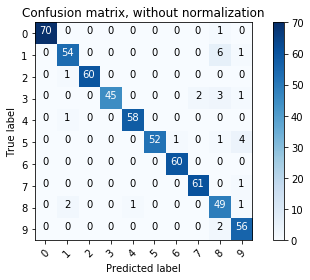

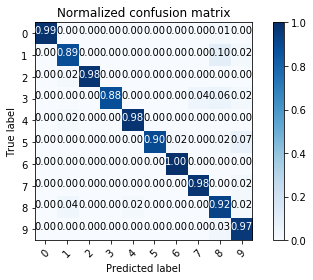

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression().fit(X_train, y_train)
y_out_lr = logreg.predict(X_test)     
print_results(model="Logistic Regression", classifier=y_out_lr, test=y_test)

### 1.2.- Perceptron

1.- Accuracy of Perceptron classifier on test set: 0.928
2.- Classification report for Perceptron model:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        71
          1       0.86      0.92      0.89        61
          2       0.95      0.98      0.97        61
          3       1.00      0.76      0.87        51
          4       1.00      0.92      0.96        59
          5       0.85      0.95      0.89        58
          6       0.90      1.00      0.94        60
          7       0.97      0.95      0.96        62
          8       0.85      0.89      0.87        53
          9       0.94      0.88      0.91        58

avg / total       0.93      0.93      0.93       594


3.- Confusion matrix:



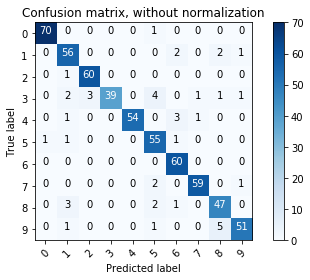

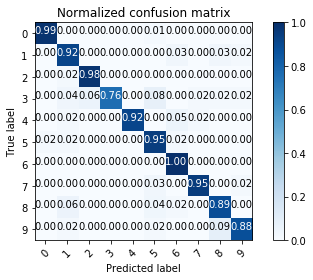

In [9]:
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf_per = Perceptron(tol=1e-3, random_state=0)
clf_per.fit(X_train, y_train)
y_out_per = clf_per.predict(X_test)
print_results(model="Perceptron", classifier=y_out_per, test=y_test)

### 1.3.- SVM

1.- Accuracy of SVM classifier on test set: 0.971
2.- Classification report for SVM model:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        71
          1       0.94      0.98      0.96        61
          2       0.98      1.00      0.99        61
          3       0.96      0.96      0.96        51
          4       0.98      1.00      0.99        59
          5       1.00      0.91      0.95        58
          6       0.98      1.00      0.99        60
          7       0.98      0.98      0.98        62
          8       0.96      0.91      0.93        53
          9       0.92      0.97      0.94        58

avg / total       0.97      0.97      0.97       594


3.- Confusion matrix:



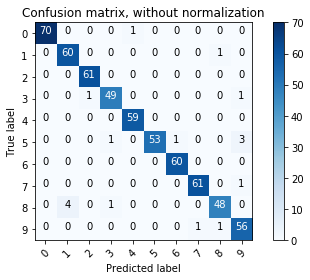

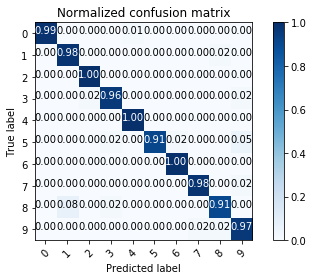

In [10]:
from sklearn import svm
clf_svm = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
clf_svm.fit(X_train, y_train)
y_out_svm = clf_svm.predict(X_test)
print_results(model="SVM", classifier=y_out_svm, test=y_test)

### 1.4.- Random Forest

1.- Accuracy of Random Forest classifier on test set: 0.961
2.- Classification report for Random Forest model:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        71
          1       0.94      1.00      0.97        61
          2       0.97      0.97      0.97        61
          3       0.98      0.94      0.96        51
          4       0.98      0.98      0.98        59
          5       0.95      0.95      0.95        58
          6       0.98      0.98      0.98        60
          7       0.94      0.98      0.96        62
          8       0.96      0.91      0.93        53
          9       0.95      0.90      0.92        58

avg / total       0.96      0.96      0.96       594


3.- Confusion matrix:



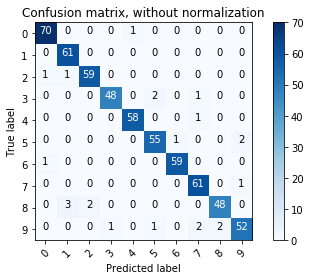

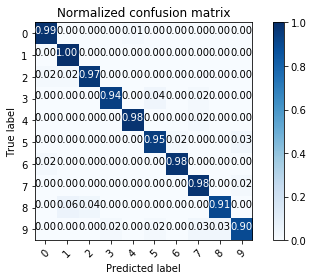

In [11]:
#!/usr/bin/env python -W ignore::DeprecationWarning
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_out_rf = clf_rf.predict(X_test)
print_results(model="Random Forest", classifier=y_out_rf, test=y_test)

### 1.5.- Anàlisis dels resultats

LR: Mean accuracy: 0.955923 Standard deviation accuracy:(0.021077)
PRC: Mean accuracy: 0.901074 Standard deviation accuracy:(0.024567)
SVM: Mean accuracy: 0.975069 Standard deviation accuracy:(0.014371)
RF: Mean accuracy: 0.965090 Standard deviation accuracy:(0.012756)


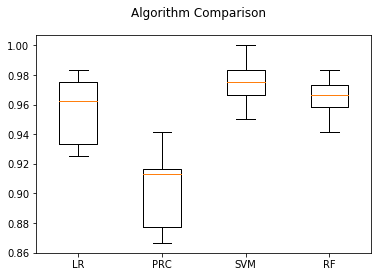

In [12]:
get_results(X_train, y_train)

### 1.6.- Conclusió

Tenint en compte els resultats de les matrius de confusió i els Classification Report de cada model, es poden classificar els models d'aquesta manera (de millor a pitjor):

    1) SVM: òptim perque empra distàncies per poder classificar cada x en la classe corresponent. 
    Per tant, la classificació amb SVM resulta molt més fiable que amb la resta. 
            
    2) Random Forest: com es tracta d'un dataset amb una gran dimensionalitat (64 dimensions), 
    l'algoritme de RF ha estat capaç de classificar les dades amb un resultat molt bo.
            
    3) Regressió Logística : aquest algoritme, tot i que seguiex una estratègia similar a l'aplicat 
    per SVM, no té en compte la distància a la qual es troba cada punt de la hiperplana i, per tant, 
    no és capaç de fer un separació de les classes igual de fiable. A més, aquest algoritme es veu 
    molt afectat pels paràmetres irregulars i la funció de cost resultant no és la que millor pot 
    descriure les dades. 

    4) Perceptron: a l'igual que la Regressió Logística, aquest algoritme intenta traçar una 
    recta que separi les classes; no obstant, no es garanteix que trobi la funció de la recta 
    òptima (la que un humà veuría evident, per exemple). Com es pot veure la imatge, aquest 
    model trobaría les rectes més fluixes, tot que la més gruixa és la millor per separar 
    aquestes dues classes.

## 2.- Dificultad B.
En el segon exercici (dificultat B), farem la comparació del rendiment dels tres models anteriors amb el data set complert del repositori UCI Machine learning[8]. Primer proveu si canvien els resultats de l’exercici 1 quan s’aplica a noves dades no emprades a aprenentatge ni a test.
Després, intentar millorar els resultats re-aprenent els models amb nous conjunts d’aprenentatge, test i validació, emprant el mètode de k-fold crossvalidation[9] per triar el millor model.

In [13]:
import pandas as pd
data = pd.read_csv('optdigits.tra')
data_test = pd.read_csv('optdigits.tes')
data_y = data.iloc[:, -1]
data_x = data.drop(data.columns[data.shape[1] - 1], axis = 1)

data_y_test = data_test.iloc[:, -1]
data_x_test = data_test.drop(data_test.columns[data_test.shape[1] - 1], axis = 1)

### 2.1.- Predecir los resultados con el modelo entrenado anteriormente

#### Regresión Logística

1.- Accuracy of Logistic Regression classifier on test set: 0.934
2.- Classification report for Logistic Regression model:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       375
          1       0.92      0.84      0.88       389
          2       0.96      0.97      0.97       380
          3       0.92      0.95      0.93       389
          4       0.96      0.91      0.94       387
          5       0.98      0.88      0.93       376
          6       0.95      0.99      0.97       377
          7       0.97      0.98      0.98       387
          8       0.86      0.89      0.87       380
          9       0.86      0.93      0.89       382

avg / total       0.94      0.93      0.93      3822


3.- Confusion matrix:



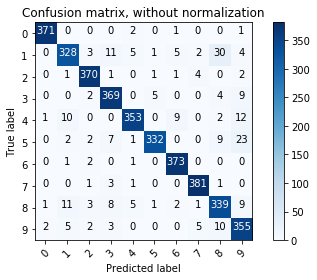

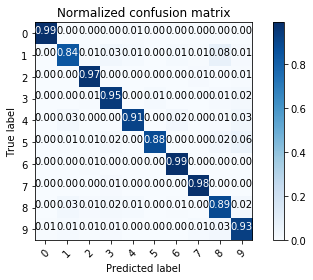

In [14]:
y_out_lr = logreg.predict(data_x)    
print_results(model="Logistic Regression", classifier=y_out_lr, test=data_y)

#### Perceptron

1.- Accuracy of Perceptron classifier on test set: 0.918
2.- Classification report for Perceptron model:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       375
          1       0.90      0.94      0.92       389
          2       0.95      0.96      0.96       380
          3       0.99      0.81      0.89       389
          4       0.99      0.79      0.88       387
          5       0.86      0.94      0.90       376
          6       0.85      0.98      0.91       377
          7       0.97      0.99      0.98       387
          8       0.86      0.92      0.89       380
          9       0.89      0.86      0.87       382

avg / total       0.92      0.92      0.92      3822


3.- Confusion matrix:



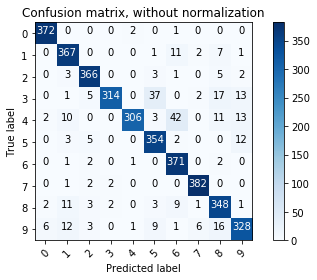

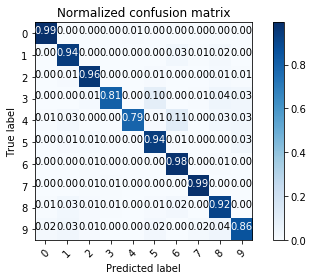

In [15]:
y_out_per = clf_per.predict(data_x)
print_results(model="Perceptron", classifier=y_out_per, test=data_y)

#### SVM

1.- Accuracy of SVM classifier on test set: 0.959
2.- Classification report for SVM model:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       375
          1       0.94      0.96      0.95       389
          2       0.99      0.98      0.99       380
          3       0.95      0.98      0.96       389
          4       0.97      0.94      0.95       387
          5       0.99      0.90      0.94       376
          6       0.96      0.99      0.98       377
          7       0.95      0.99      0.97       387
          8       0.95      0.93      0.94       380
          9       0.90      0.93      0.92       382

avg / total       0.96      0.96      0.96      3822


3.- Confusion matrix:



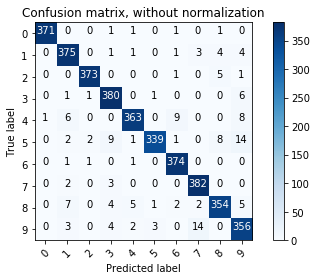

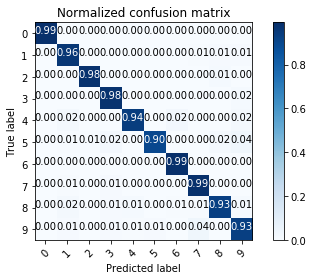

In [16]:
y_out_svm = clf_svm.predict(data_x)
print_results(model="SVM", classifier=y_out_svm, test=data_y)

####  Random Forest

1.- Accuracy of Random Forest classifier on test set: 0.951
2.- Classification report for Random Forest model:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       375
          1       0.96      0.97      0.97       389
          2       0.98      0.98      0.98       380
          3       0.96      0.93      0.95       389
          4       0.98      0.93      0.95       387
          5       0.98      0.92      0.95       376
          6       0.97      0.99      0.98       377
          7       0.90      0.99      0.94       387
          8       0.96      0.92      0.94       380
          9       0.86      0.87      0.86       382

avg / total       0.95      0.95      0.95      3822


3.- Confusion matrix:



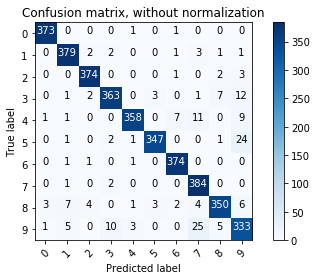

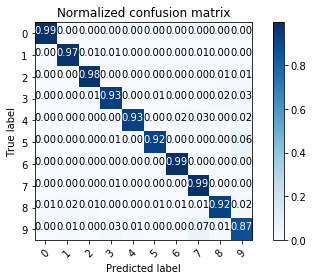

In [17]:
y_out_rf = clf_rf.predict(data_x)
print_results(model="Random Forest", classifier=y_out_rf, test=data_y)

#### Análisis de los resultados

LR: Mean accuracy: 0.959187 Standard deviation accuracy:(0.010712)
PRC: Mean accuracy: 0.937206 Standard deviation accuracy:(0.026969)
SVM: Mean accuracy: 0.976973 Standard deviation accuracy:(0.011694)
RF: Mean accuracy: 0.979073 Standard deviation accuracy:(0.006278)


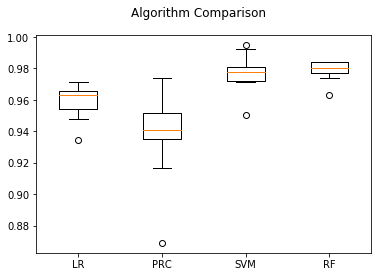

In [18]:
get_results(data_x, data_y)

#### Conclusió

Els models entrenats anteriorment han estat capacos de predir les sortides correctes quan s'han analitzat unes dades de major dimensió, i han mantingut el mateix nivell de accuracy.

### 2.2.- Entrenar de nuevo los modelos con el dataset completo

#### Regresión Logística

1.- Accuracy of Logistic Regression classifier on test set: 0.947
2.- Classification report for Logistic Regression model:
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       177
          1       0.90      0.93      0.92       182
          2       0.99      0.97      0.98       177
          3       0.98      0.93      0.96       183
          4       0.96      0.97      0.97       181
          5       0.90      0.97      0.93       182
          6       0.99      0.98      0.99       181
          7       0.99      0.92      0.95       179
          8       0.90      0.89      0.89       174
          9       0.88      0.92      0.90       180

avg / total       0.95      0.95      0.95      1796


3.- Confusion matrix:



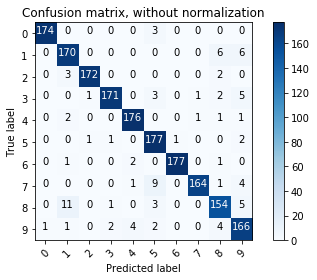

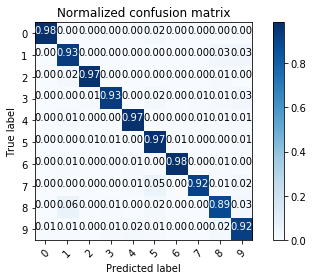

In [19]:
logreg = LogisticRegression().fit(data_x, data_y)
y_out_lr = logreg.predict(data_x_test) 
print_results(model="Logistic Regression", classifier=y_out_lr, test=data_y_test)

####  Perceptron

1.- Accuracy of Perceptron classifier on test set: 0.912
2.- Classification report for Perceptron model:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       177
          1       0.74      0.95      0.83       182
          2       0.95      0.97      0.96       177
          3       1.00      0.81      0.89       183
          4       0.99      0.76      0.86       181
          5       0.88      0.97      0.92       182
          6       0.98      0.97      0.98       181
          7       0.97      0.94      0.95       179
          8       0.85      0.88      0.86       174
          9       0.91      0.89      0.90       180

avg / total       0.92      0.91      0.91      1796


3.- Confusion matrix:



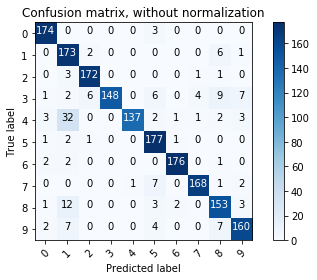

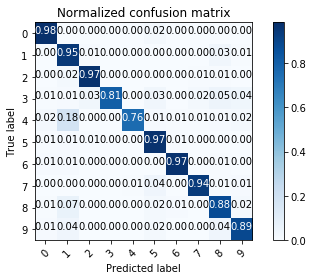

In [20]:
clf_per.fit(data_x, data_y)
y_out_per = clf_per.predict(data_x_test)
print_results(model="Perceptron", classifier=y_out_per, test=data_y_test)

#### SVM

1.- Accuracy of SVM classifier on test set: 0.961
2.- Classification report for SVM model:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       177
          1       0.92      0.98      0.95       182
          2       0.96      0.96      0.96       177
          3       0.95      0.93      0.94       183
          4       0.98      0.99      0.99       181
          5       0.92      0.99      0.95       182
          6       0.98      0.99      0.99       181
          7       0.99      0.92      0.95       179
          8       0.97      0.90      0.93       174
          9       0.96      0.94      0.95       180

avg / total       0.96      0.96      0.96      1796


3.- Confusion matrix:



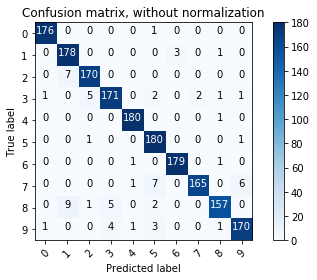

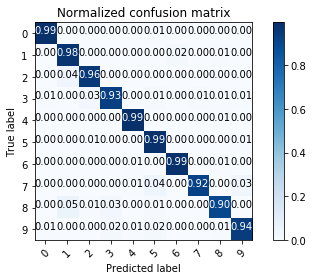

In [21]:
clf_svm.fit(data_x, data_y)
y_out_svm = clf_svm.predict(data_x_test)
print_results(model="SVM", classifier=y_out_svm, test=data_y_test)

#### Random Forest

1.- Accuracy of Random Forest classifier on test set: 0.969
2.- Classification report for Random Forest model:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       177
          1       0.95      0.99      0.97       182
          2       0.99      0.99      0.99       177
          3       0.96      0.95      0.96       183
          4       0.98      0.99      0.99       181
          5       0.98      0.97      0.98       182
          6       0.99      0.97      0.98       181
          7       0.98      0.93      0.95       179
          8       0.94      0.95      0.95       174
          9       0.92      0.94      0.93       180

avg / total       0.97      0.97      0.97      1796


3.- Confusion matrix:



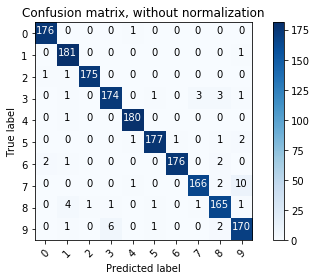

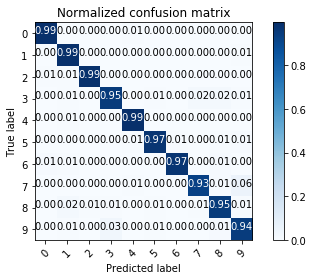

In [22]:
#Random Forest
clf_rf.fit(data_x, data_y)
y_out_rf = clf_rf.predict(data_x_test)
print_results(model="Random Forest", classifier=y_out_rf, test=data_y_test)

LR: Mean accuracy: 0.959187 Standard deviation accuracy:(0.010712)
PRC: Mean accuracy: 0.937206 Standard deviation accuracy:(0.026969)
SVM: Mean accuracy: 0.976973 Standard deviation accuracy:(0.011694)
RF: Mean accuracy: 0.978812 Standard deviation accuracy:(0.008290)


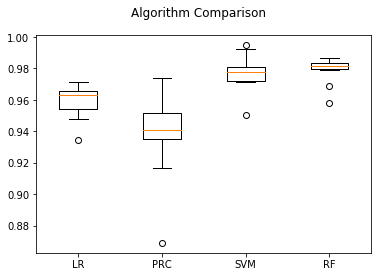

In [23]:
get_results(data_x, data_y)

#### Conclusió

Entrenar els models de nou amb un dataset més extens que el anterior no ha suposat canvis; de fet, els valors d'accurracy de cadascún no s'han modificat, llevat del de Random Forest però entra en la desviació prevista. Per tant, no hi ha hagut overfitting. 

## 3.- Dificultad A.
Finalment, en aquest tercer exercici (dificultat A) provar si els kernels no lineals milloren els resultats trobats a l’exercici anterior. Raoneu els resultats trobats i feu una conclusió global de la resolució del problema complert.

#### SVM Polynomial kernel

1.- Accuracy of SVM Polynomial kernel classifier on test set: 0.975
2.- Classification report for SVM Polynomial kernel model:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       177
          1       0.96      0.99      0.98       182
          2       0.99      0.99      0.99       177
          3       0.97      0.96      0.96       183
          4       1.00      0.99      0.99       181
          5       0.95      0.99      0.97       182
          6       0.99      1.00      1.00       181
          7       0.99      0.94      0.96       179
          8       0.96      0.94      0.95       174
          9       0.93      0.96      0.94       180

avg / total       0.98      0.97      0.97      1796


3.- Confusion matrix:



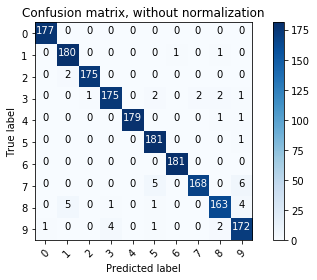

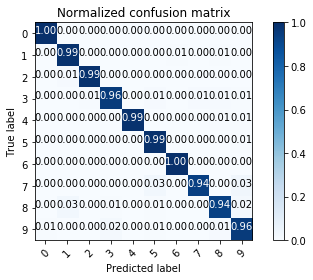

In [24]:
clf_svm_poly = svm.SVC(kernel = 'poly', decision_function_shape='ovo')
clf_svm_poly.fit(data_x, data_y)
y_out_svm_poly = clf_svm_poly.predict(data_x_test)
print_results(model="SVM Polynomial kernel", classifier=y_out_svm_poly, test=data_y_test)

#### SVM RBF kernel

1.- Accuracy of SVM RBF kernel classifier on test set: 0.562
2.- Classification report for SVM RBF kernel model:
             precision    recall  f1-score   support

          0       1.00      0.55      0.71       177
          1       1.00      0.62      0.77       182
          2       1.00      0.45      0.62       177
          3       1.00      0.54      0.70       183
          4       1.00      0.49      0.65       181
          5       1.00      0.45      0.62       182
          6       1.00      0.60      0.75       181
          7       1.00      0.37      0.54       179
          8       0.18      1.00      0.31       174
          9       1.00      0.57      0.73       180

avg / total       0.92      0.56      0.64      1796


3.- Confusion matrix:



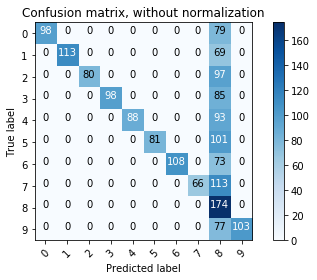

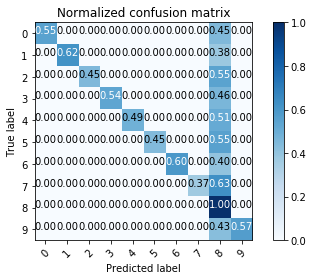

In [25]:
clf_svm_rbf = svm.SVC(decision_function_shape='ovo')
clf_svm_rbf.fit(data_x, data_y)
y_out_svm_rbf = clf_svm_rbf.predict(data_x_test)
print_results(model="SVM RBF kernel", classifier=y_out_svm_rbf, test=data_y_test)

Els problemes d'aquest kernel són:

1) Té més tendència a fer overfitting. Per tant, no és capaç de classifcar correctament. 

2) Si hi ha un atribut que es repeteix moltes vegades aquest tindrá més pes en la classificació, per tant
és com si el dataset estigues desbalancetjat. 

3) Similarment, aquest algoritme analitza les dades i les classifica segons les distàncies relatives. La funció del
kernel és κ(u,v)=exp(−‖u−v‖^2). Com es pot observar en aquest enllac,
https://stats.stackexchange.com/questions/154224/when-using-svms-why-do-i-need-to-scale-the-features, aquesta funció
no podrà classificar correctament les dades si aquestes no están escalades. 

Per poder resoldre aquest problema s'emprarà la funció StandardScaler().fit_transform() per estandarditzar les 
característiques. 

1.- Accuracy of SVM RBF kernel with scaled data classifier on test set: 0.971
2.- Classification report for SVM RBF kernel with scaled data model:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       177
          1       0.93      0.99      0.96       182
          2       0.99      0.95      0.97       177
          3       0.99      0.96      0.98       183
          4       0.95      0.99      0.97       181
          5       0.99      0.99      0.99       182
          6       0.99      0.99      0.99       181
          7       0.99      0.96      0.97       179
          8       0.98      0.91      0.94       174
          9       0.91      0.97      0.94       180

avg / total       0.97      0.97      0.97      1796


3.- Confusion matrix:



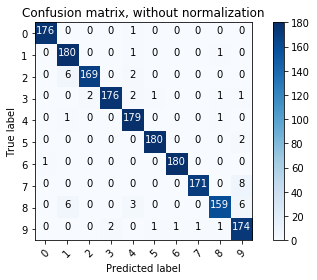

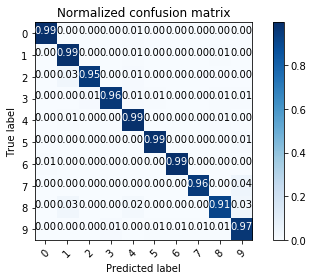

In [26]:
from sklearn.preprocessing import StandardScaler
clf_svm_rbf = svm.SVC(decision_function_shape='ovo')
X = StandardScaler().fit_transform(data_x)
X_test = StandardScaler().fit_transform(data_x_test)
clf_svm_rbf.fit(X, data_y)
y_out_svm_rbf = clf_svm_rbf.predict(X_test)
print_results(model="SVM RBF kernel with scaled data", classifier=y_out_svm_rbf, test=data_y_test)

#### SVM Sigmoid kernel

1.- Accuracy of SVM Sigmoid kernel classifier on test set: 0.102
2.- Classification report for SVM Sigmoid kernel model:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       177
          1       0.00      0.00      0.00       182
          2       0.00      0.00      0.00       177
          3       0.10      1.00      0.19       183
          4       0.00      0.00      0.00       181
          5       0.00      0.00      0.00       182
          6       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       179
          8       0.00      0.00      0.00       174
          9       0.00      0.00      0.00       180

avg / total       0.01      0.10      0.02      1796


3.- Confusion matrix:



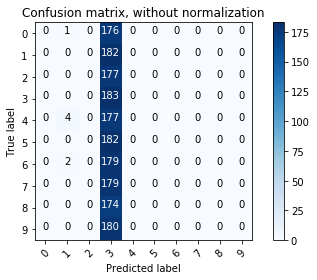

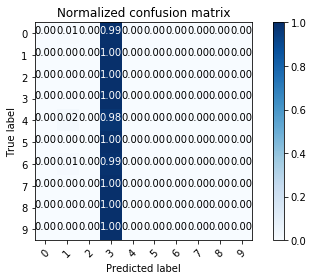

In [27]:
clf_svm_sig = svm.SVC(kernel ='sigmoid', decision_function_shape='ovo')
clf_svm_sig.fit(data_x, data_y)
y_out_svm_sig = clf_svm_sig.predict(data_x_test)
print_results(model="SVM Sigmoid kernel", classifier=y_out_svm_sig, test=data_y_test)

Aquest kernel és el que pitjor rendiment té. Per millorar els resultats es realitzarà un GridSearch per poder trobar els millors paràmetres (c i gamma) per aquest model perque sigui capaç de fer la millor classificació de les dades. 

##### Mejora SVM Sigmoid kernel

The best parameters are {'C': 1, 'gamma': 0.001} with a score of 0.75
1.- Accuracy of SVM Sigmoid with better params classifier on test set: 0.718
2.- Classification report for SVM Sigmoid with better params model:
             precision    recall  f1-score   support

          0       0.92      0.79      0.85       177
          1       0.56      0.49      0.52       182
          2       0.94      0.83      0.88       177
          3       0.88      0.88      0.88       183
          4       0.40      0.81      0.53       181
          5       0.76      0.79      0.77       182
          6       0.91      0.63      0.75       181
          7       0.93      0.86      0.89       179
          8       0.50      0.36      0.42       174
          9       0.77      0.74      0.75       180

avg / total       0.76      0.72      0.72      1796


3.- Confusion matrix:



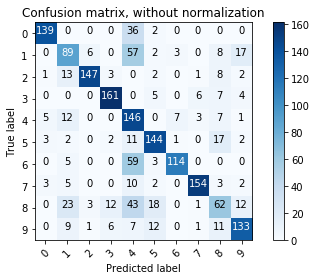

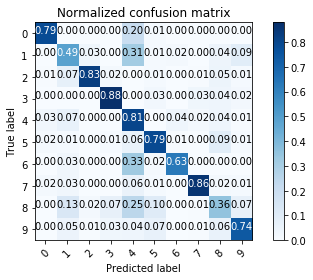

In [28]:
from sklearn.model_selection import GridSearchCV
params = {"C":[0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(clf_svm_sig, params)
grid_search.fit(data_x,data_y)
y_grid_search_sig = grid_search.predict(data_x_test)

print("The best parameters are %s with a score of %0.2f"
      % (grid_search.best_params_, grid_search.best_score_))

print_results(model="SVM Sigmoid with better params", classifier=y_grid_search_sig, test=data_y_test)

LR: Mean accuracy: 0.958142 Standard deviation accuracy:(0.010700)
PRC: Mean accuracy: 0.931453 Standard deviation accuracy:(0.011554)
SVM Linear: Mean accuracy: 0.977499 Standard deviation accuracy:(0.009876)
SVM RBF: Mean accuracy: 0.982731 Standard deviation accuracy:(0.007692)
SVM Poly: Mean accuracy: 0.976714 Standard deviation accuracy:(0.009316)
SVM Sigmoid: Mean accuracy: 0.938258 Standard deviation accuracy:(0.014686)
SVM Sigmoid Mejora: Mean accuracy: 0.976453 Standard deviation accuracy:(0.008668)
RF: Mean accuracy: 0.979335 Standard deviation accuracy:(0.008767)


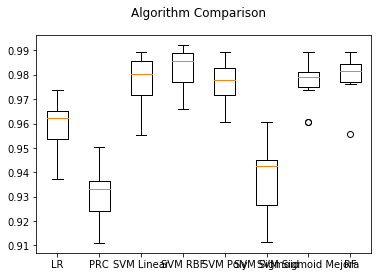

In [29]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('PRC', Perceptron(tol=1e-3, random_state=0)))
models.append(('SVM Linear', svm.SVC(kernel = 'linear', decision_function_shape='ovo')))
models.append(('SVM RBF', svm.SVC(decision_function_shape='ovo')))
models.append(('SVM Poly', svm.SVC(kernel = 'poly', decision_function_shape='ovo')))
models.append(('SVM Sigmoid', svm.SVC(kernel = 'sigmoid', decision_function_shape='ovo')))
clf_svm_sig = svm.SVC(kernel ='sigmoid', decision_function_shape='ovo')
params = {"C":[0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}
models.append(('SVM Sigmoid Mejora', GridSearchCV(clf_svm_sig, params)))
#No se puede usar kernel precomputed porque los datos no tienen la forma (n_samples, n_samples)
#models.append(('SVM Precomputed kernel', svm.SVC(kernel = 'precomputed', decision_function_shape='ovo')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
X = StandardScaler().fit_transform(data_x)
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, data_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Mean accuracy: %f Standard deviation accuracy:(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names) 
plt.show()

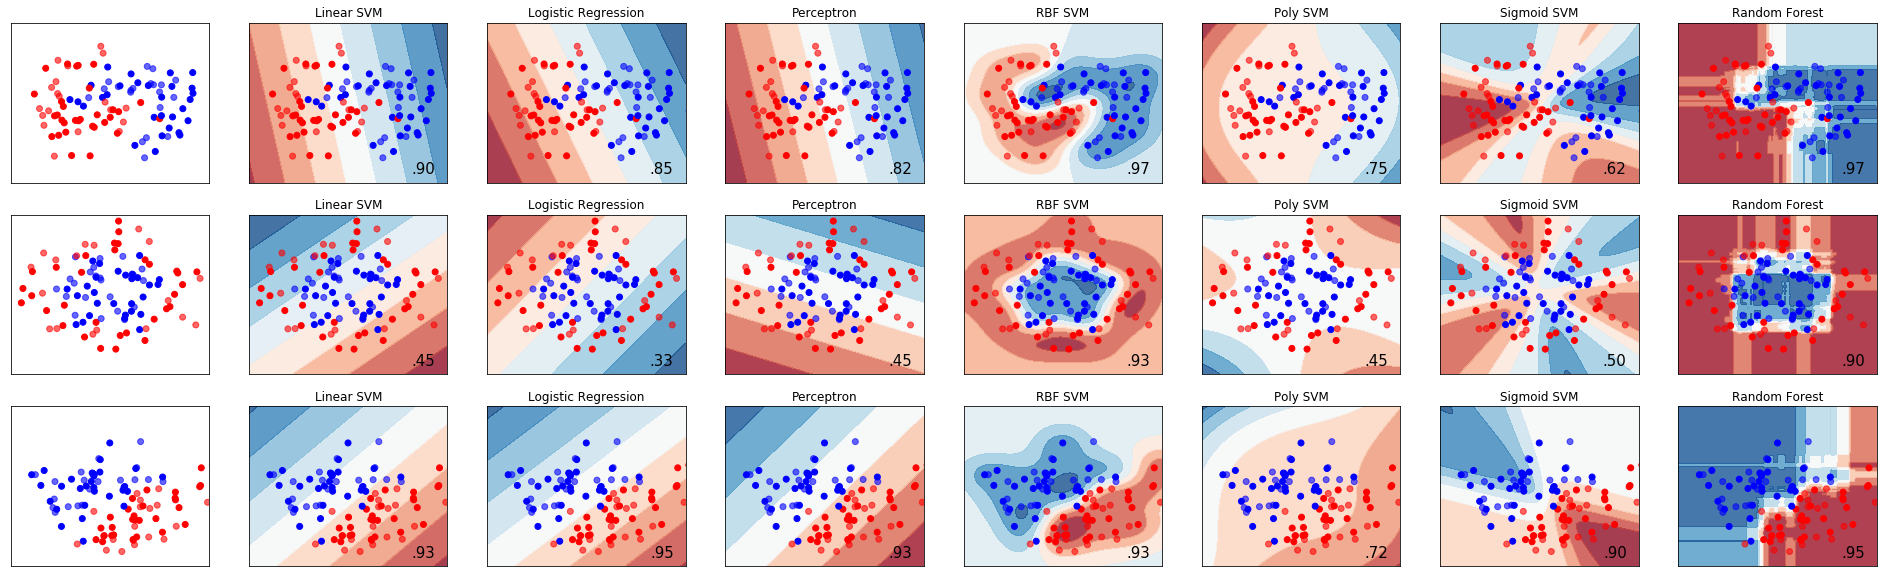

In [33]:
show_models_classification()

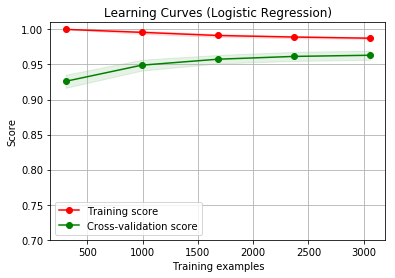

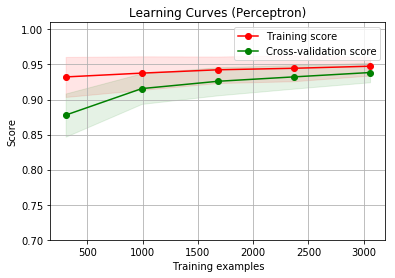

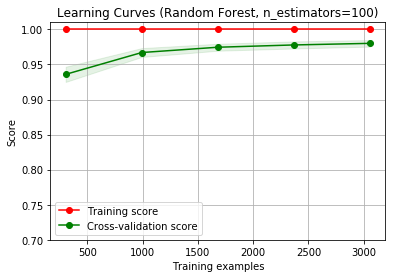

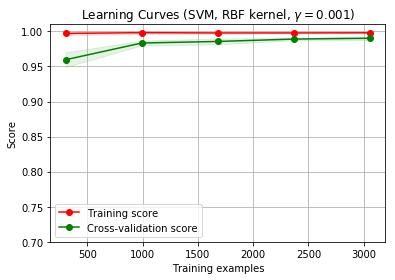

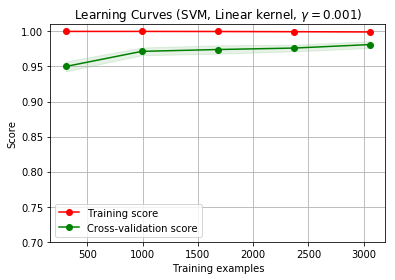

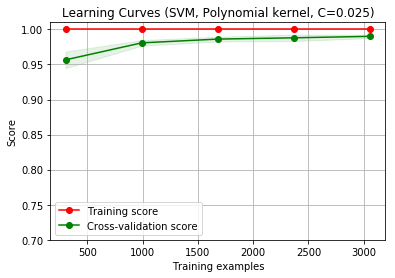

In [34]:
learning_curves()